# <center> Практична робота 02 </center> <center> Математичні основи машинного навчання </center>

___Завдання:___ 
1. Основи роботи з бібліотекою NumPy (2 бали)
2. Обробка зображень засобами бібліотеки NumPy (3 бали)
3. Перевірка гіпотез за допомогою пакетів scipy.stats та statsmodels (1 бал)

___За прострочку___ додаткове завдання: пройти додатковий туторіал

### <p style='text-align: right;'> Виконав студент групи <ins>2П-20</ins> </p><p style='text-align: right;'> <ins>Короп Максим Анатолійович</ins> </p><p style='text-align: right;'> <ins>Номер у списку групи: 11</ins> </p>
##### Варіант визначається як (Ваш номер у списку групи % кількість варіантів) + 1

## 1. Основи роботи з бібліотекою NumPy (2 бали)
### 1.1. Імпортуйте пакет numpy та виведіть його версію і конфігурацію (метод show_config())

In [1]:
import numpy as np

np.show_config()

openblas64__info:
    library_dirs = ['D:\\a\\1\\s\\numpy\\build\\openblas64__info']
    libraries = ['openblas64__info']
    language = f77
    define_macros = [('HAVE_CBLAS', None), ('BLAS_SYMBOL_SUFFIX', '64_'), ('HAVE_BLAS_ILP64', None)]
blas_ilp64_opt_info:
    library_dirs = ['D:\\a\\1\\s\\numpy\\build\\openblas64__info']
    libraries = ['openblas64__info']
    language = f77
    define_macros = [('HAVE_CBLAS', None), ('BLAS_SYMBOL_SUFFIX', '64_'), ('HAVE_BLAS_ILP64', None)]
openblas64__lapack_info:
    library_dirs = ['D:\\a\\1\\s\\numpy\\build\\openblas64__lapack_info']
    libraries = ['openblas64__lapack_info']
    language = f77
    define_macros = [('HAVE_CBLAS', None), ('BLAS_SYMBOL_SUFFIX', '64_'), ('HAVE_BLAS_ILP64', None), ('HAVE_LAPACKE', None)]
lapack_ilp64_opt_info:
    library_dirs = ['D:\\a\\1\\s\\numpy\\build\\openblas64__lapack_info']
    libraries = ['openblas64__lapack_info']
    language = f77
    define_macros = [('HAVE_CBLAS', None), ('BLAS_SYMBOL_SUFFIX', 

### 1.2. # Результат має бути подібний до такого:
#### 1 1 1 1 <br> 1 0 0 1 <br>  1 0 0 1 <br> 1 1 1 1


In [2]:
np.matrix('1 1 1 1; 1 0 0 1; 1 0 0 1; 1 1 1 1')

matrix([[1, 1, 1, 1],
        [1, 0, 0, 1],
        [1, 0, 0, 1],
        [1, 1, 1, 1]])

### 1.3. Створіть власний dtype-об'єкт, який описуватиме колір як 4 значення типу unsigned byte. Почитайте про np.dtype()

In [3]:
color = np.dtype([('R', 'B'), ('G', 'B'), ('B', 'B'), ('A', 'B')])
color

dtype([('R', 'u1'), ('G', 'u1'), ('B', 'u1'), ('A', 'u1')])

### 1.4. Виведіть дати для сьогодні, вчора та завтра. Розгляньте роботу з np.datetime64()

In [4]:
yd = np.datetime64('2022-03-28')
td = np.datetime64('2022-03-29')
tmr = np.datetime64('2022-03-30')
td, yd, tmr

(numpy.datetime64('2022-03-29'),
 numpy.datetime64('2022-03-28'),
 numpy.datetime64('2022-03-30'))

### 1.5. Розгляньте генераторну функцію (з yield), яка виступить ітератором для генерації 10 цілих чисел для масиву. Розгляньте роботу np.fromiter()

In [5]:
iterable = (a for a in range(10))
itered = np.fromiter(iterable, int)
itered

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### 1.6. Знайдіть найближче до заданого скаляра значення в векторі. Для цього можна знайти індекс елементу, який найменше відрізняється від цього скаляра (модуль різниці) 

In [6]:
scal = 7
vect = np.array([2, 4, 10, 1, 9, -1, 12])
arr = np.abs(vect-scal)
vect[np.nanargmin(arr)]

9

### 1.7. Розташуйте випадковим чином p елементів (одиниць) у 2D-масиві розміром N x N. Розгляньте метод np.put()

In [7]:
from random import randint as rnt
N = 4
arr = np.zeros((N, N))
p = 3
for i in range(p):
    np.put(arr[rnt(0, 3)], rnt(0, 3), 1)
arr

array([[0., 0., 0., 0.],
       [1., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 0.]])

### 1.8. Задано вектор [1, 2, 3, 4, 5]. Створіть новий вектор, який вставлятиме між сусідніми елементами ппочаткового вектора по три нульових елементи

In [8]:
vect = np.array([1, 2, 3, 4, 5])
nvect = np.array([])
for i in range(len(vect)):
    nvect = np.append(nvect, vect[i])
    if i == len(vect)-1:
        break
    nvect = np.append(nvect, vect[0])
    nvect = np.append(nvect, vect[0])
    nvect = np.append(nvect, vect[0])
nvect

array([1., 1., 1., 1., 2., 1., 1., 1., 3., 1., 1., 1., 4., 1., 1., 1., 5.])

# 

## 2. Обробка зображень засобами бібліотеки NumPy (3 бали)
### 2.1. Опануйте попіксельне створення растрових зображень, програмно відобразивши на екрані бісерні рисунки відповідно до свого варіанту. Колір пікселів підбираєте вручну, за допомогою графічного редактора або спеціальних сервісів, як imagecolorpicker.com:
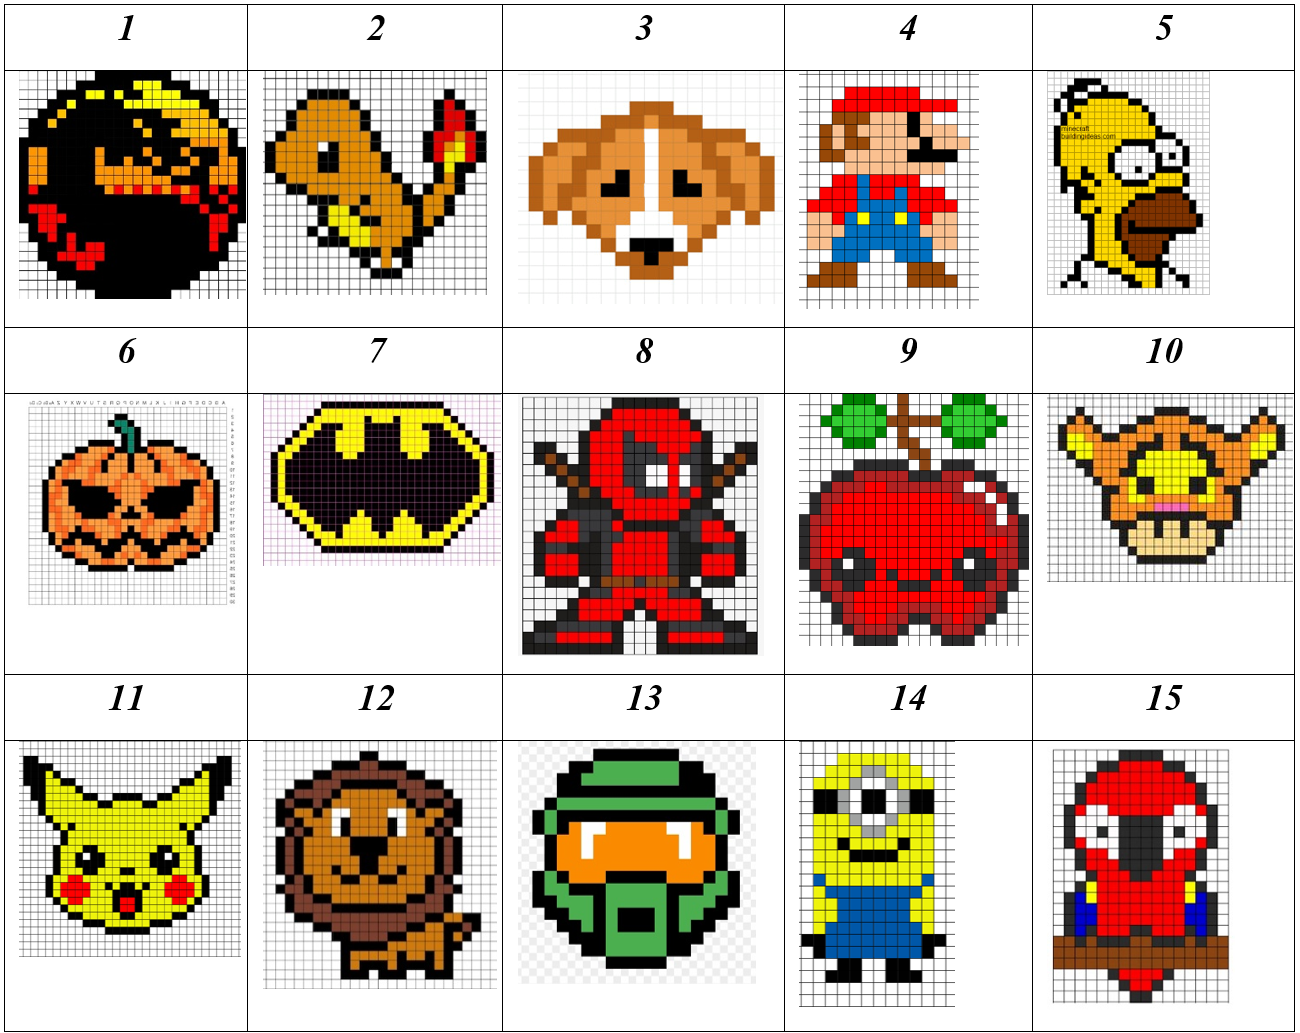

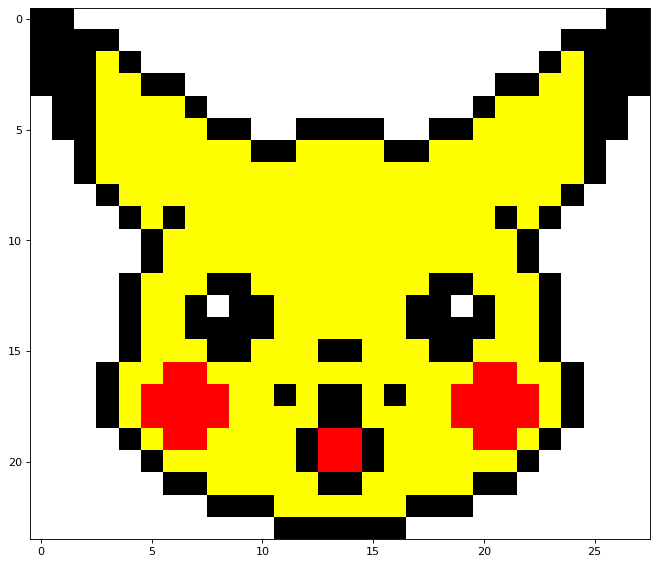

In [9]:
import matplotlib.pyplot as plt

img = np.array([
    [[0, 0, 0], [0, 0, 0], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [0, 0, 0], [0, 0, 0]],
    [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]],
    [[0, 0, 0], [0, 0, 0], [0, 0, 0], [255, 255, 0], [0, 0, 0], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [0, 0, 0], [255, 255, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]],
    [[0, 0, 0], [0, 0, 0], [0, 0, 0], [255, 255, 0], [255, 255, 0], [0, 0, 0], [0, 0, 0], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [0, 0, 0], [0, 0, 0], [255, 255, 0], [255, 255, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]],
    [[255, 255, 255], [0, 0, 0], [0, 0, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [0, 0, 0], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [0, 0, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [0, 0, 0], [0, 0, 0], [255, 255, 255]],
    [[255, 255, 255], [0, 0, 0], [0, 0, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [0, 0, 0], [0, 0, 0], [255, 255, 255], [255, 255, 255], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [255, 255, 255], [255, 255, 255], [0, 0, 0], [0, 0, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [0, 0, 0], [0, 0, 0], [255, 255, 255]],
    [[255, 255, 255], [255, 255, 255], [0, 0, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [0, 0, 0], [0, 0, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [0, 0, 0], [0, 0, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [0, 0, 0], [255, 255, 255], [255, 255, 255]],
    [[255, 255, 255], [255, 255, 255], [0, 0, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [0, 0, 0], [255, 255, 255], [255, 255, 255]],
    [[255, 255, 255], [255, 255, 255], [255, 255, 255], [0, 0, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [0, 0, 0], [255, 255, 255], [255, 255, 255], [255, 255, 255]],
    [[255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [0, 0, 0], [255, 255, 0], [0, 0, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [0, 0, 0], [255, 255, 0], [0, 0, 0], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255]],
    [[255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [0, 0, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [0, 0, 0], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255]],
    [[255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [0, 0, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [0, 0, 0], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255]],
    [[255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [0, 0, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [0, 0, 0], [0, 0, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [0, 0, 0], [0, 0, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [0, 0, 0], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255]],
    [[255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [0, 0, 0], [255, 255, 0], [255, 255, 0], [0, 0, 0], [255, 255, 255], [0, 0, 0], [0, 0, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [0, 0, 0], [0, 0, 0], [255, 255, 255], [0, 0, 0], [255, 255, 0], [255, 255, 0], [0, 0, 0], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255]],
    [[255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [0, 0, 0], [255, 255, 0], [255, 255, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [255, 255, 0], [255, 255, 0], [0, 0, 0], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255]],
    [[255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [0, 0, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [0, 0, 0], [0, 0, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [0, 0, 0], [0, 0, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [0, 0, 0], [0, 0, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [0, 0, 0], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255]],
    [[255, 255, 255], [255, 255, 255], [255, 255, 255], [0, 0, 0], [255, 255, 0], [255, 255, 0], [255, 0, 0], [255, 0, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 0, 0], [255, 0, 0], [255, 255, 0], [255, 255, 0], [0, 0, 0], [255, 255, 255], [255, 255, 255], [255, 255, 255]],
    [[255, 255, 255], [255, 255, 255], [255, 255, 255], [0, 0, 0], [255, 255, 0], [255, 0, 0], [255, 0, 0], [255, 0, 0], [255, 0, 0], [255, 255, 0], [255, 255, 0], [0, 0, 0], [255, 255, 0], [0, 0, 0], [0, 0, 0], [255, 255, 0], [0, 0, 0], [255, 255, 0], [255, 255, 0], [255, 0, 0], [255, 0, 0], [255, 0, 0], [255, 0, 0], [255, 255, 0], [0, 0, 0], [255, 255, 255], [255, 255, 255], [255, 255, 255]],
    [[255, 255, 255], [255, 255, 255], [255, 255, 255], [0, 0, 0], [255, 255, 0], [255, 0, 0], [255, 0, 0], [255, 0, 0], [255, 0, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [0, 0, 0], [0, 0, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 0, 0], [255, 0, 0], [255, 0, 0], [255, 0, 0], [255, 255, 0], [0, 0, 0], [255, 255, 255], [255, 255, 255], [255, 255, 255]],
    [[255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [0, 0, 0], [255, 255, 0], [255, 0, 0], [255, 0, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [0, 0, 0], [255, 0, 0], [255, 0, 0], [0, 0, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 0, 0], [255, 0, 0], [255, 255, 0], [0, 0, 0], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255]],
    [[255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [0, 0, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [0, 0, 0], [255, 0, 0], [255, 0, 0], [0, 0, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [0, 0, 0], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255]],
    [[255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [0, 0, 0], [0, 0, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [0, 0, 0], [0, 0, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [0, 0, 0], [0, 0, 0], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255]],
    [[255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [0, 0, 0], [0, 0, 0], [0, 0, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255]],
    [[255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255]]
    ])
plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(img)
plt.show()

### 2.2. Створіть подібне зображення на основі програмно згенерованого NumPy-масиву. Наприклад, можете взяти розмір квадратиків 8х8 пікселів
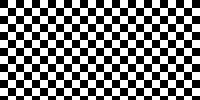

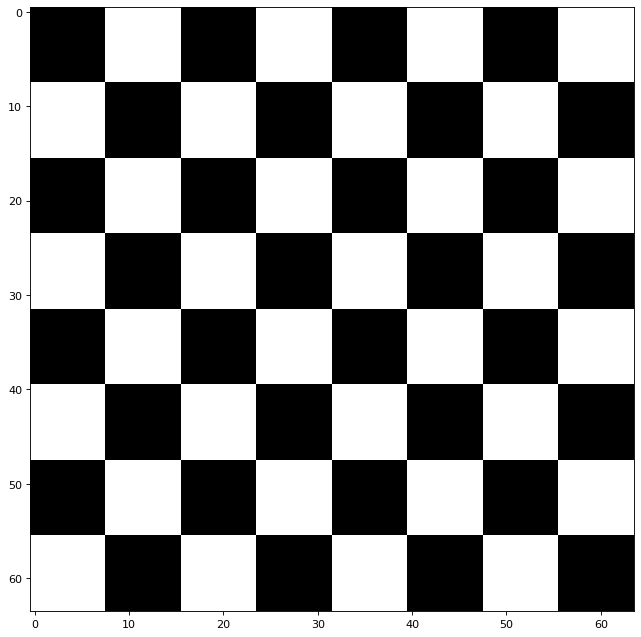

In [10]:
LIST=[]
for i in range(64):
    LIST.insert(i,[])
    k=LIST[i]
    if i%16==0 or i%16==1 or i%16==2 or i%16==3 or i%16==4 or i%16==5 or i%16==6 or i%16==7:
        for j in range(64):
            if j%16==0 or j%16==1 or j%16==2 or j%16==3 or j%16==4 or j%16==5 or j%16==6 or j%16==7:
                k.insert(j,[0,0,0])
            else:
                k.insert(j,[255,255,255])
    else:
        for j in range(64):
            if j%16==0 or j%16==1 or j%16==2 or j%16==3 or j%16==4 or j%16==5 or j%16==6 or j%16==7:
                k.insert(j,[255,255,255])
            else:
                k.insert(j,[0,0,0])

plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(LIST)
plt.show()

### 2.3. Зімітуйте подібну поломку екрану для довільного кольорового зображення.
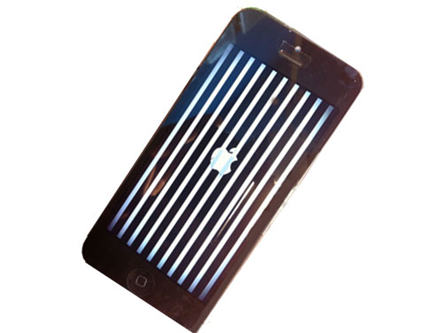


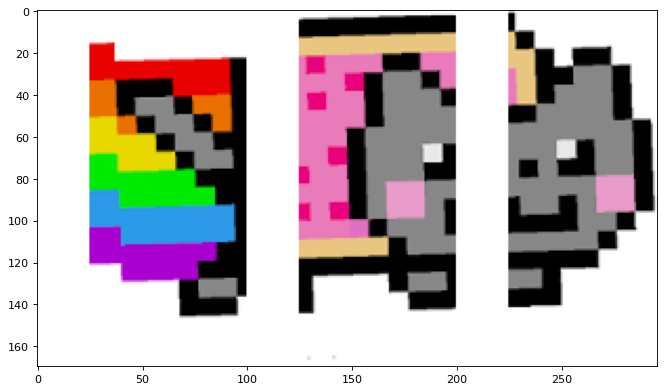

In [11]:
import cv2
I = cv2.imread('123.png')[:,:,::-1]
for i,px in enumerate(I):
    for k,noneeded in enumerate(px):
        if k % 100<25:
            I[i][k] =[255,255,255]

plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(I)
plt.show()

### 2.4. Створіть RGBA-зображення з градієнтним кольором, на зразок таких:
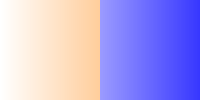
#### Градієнтність кольору задається каналом прозорості (значення від 0 до 255), тому слід намагатись рівномірно збільшувати значення каналу прозорості по стовпцях матриці зображення з однотонним значенням кольору

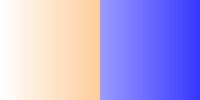

In [12]:
from PIL import Image

array = np.zeros([100, 200, 4], dtype=np.uint8)
array[:,:100] = [255, 128, 0, 255]
array[:,100:] = [0, 0, 255, 255]

for x in range(200):
    for y in range(100):
        array[y, x, 3] = x

img = Image.fromarray(array)
img

### 2.5. Порівняння 2 зображень за допомогою NumPy-операцій

#### Завантажте [зображення 1](https://csbc-edu.github.io/programming-essentials/materials/sushi1.png) та [зображення 2](https://csbc-edu.github.io/programming-essentials/materials/sushi2.png). 


In [13]:
first = cv2.imread('sushi1.png')
second = cv2.imread('sushi2.png')

#### Першим кроком для знаходження відмінностей стає [усунення альфа-каналу із зображень](http://vda.univie.ac.at/Teaching/SIP/19s/Tutorial/image_processing.html) (залишаємо тільки RGB значення в масиві). 

In [14]:
first =first[:,:,0:3]
second = second[:,:,0:3]

#### Далі швидко знебарвіть зображення, виконуючи усереднення по RGB каналах за допомогою функції numpy.mean(). Зверніть увагу, що зображення є двовимірним об’єктом, тому також потрібно задати параметр axis. Отримавши чорно-білі зображення, знайдіть їх різницю та виведіть на екран її зображення.

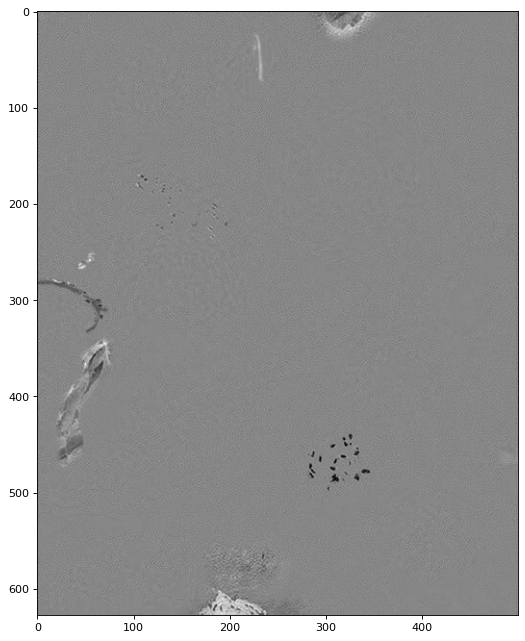

In [15]:
grey_first=np.mean(first,axis = 2)
grey_second=np.mean(second,axis=2)

difference = grey_first-grey_second

plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(difference)
plt.gray()
plt.show()

#### Уже з’явились перші контури об’єктів, що відрізняються на вище згаданих зображеннях. Проте варто зауважити, що різниця між пікселями може призвести до появи від’ємних значень. Виведіть мінімальне та максимальне значення пікселя для даного зображення та помітите це. Для відображення всіх значень у проміжок [0; 1] піднесемо їх усі до квадрату. 

-234.33333333333331 211.0


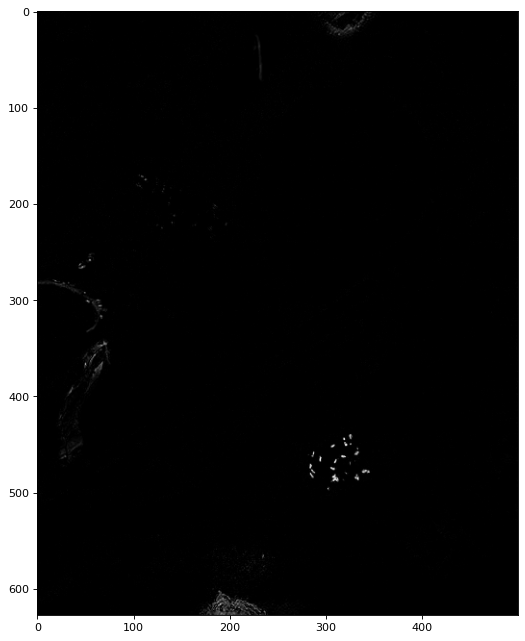

In [16]:
print(difference.min(),difference.max())
difference_square=difference**2
plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(difference_square)
plt.show()

#### Яскравіше виділити області зображень, які відрізняються, можна за рахунок додавання порогового значення, яке відкине всі близькі до 0 значення пікселів. Наприклад, візьмемо поріг 0.05 (5%). Тоді пікселі, значення яких відрізняються для двох зображень більш суттєво, стануть білими (True), а менше порогу – стануть чорними (False)

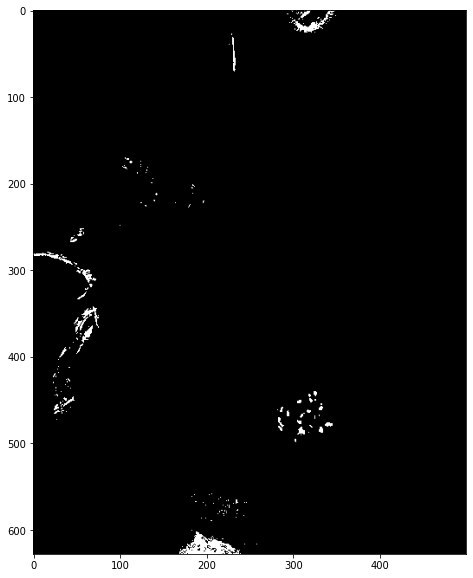

In [17]:
difference_px=difference_square>3000
plt.figure(figsize=(10, 10))
plt.imshow(difference_px)
plt.show()

#### Наступний крок – позначити відмінності власне на зображеннях. Для цього потрібно нанести додатковий прошарок на початкове зображення, зробивши його, по суті, тривимірним. Цього можна добитись, наприклад, застосувавши функцію numpy.reshape() (розміри по х та у залишаються, проте з’явиться третій вимір - np.reshape(зображення, (x-розмір, y-розмір, 1)). 

In [18]:
x,y=grey_first.shape
grey_3d=np.reshape(grey_first,(x,y,1))

#### Далі потрібно буде накласти отриману на останньому зображенні маску на кожний канал зображення. В цьому допоможе функція numpy.tile():
різницяRGB = np.tile(3d-зображення, (1, 1, 3))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


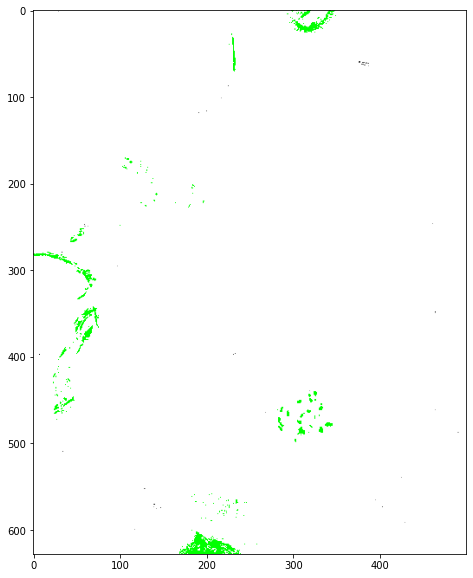

In [19]:
difference_RGB=np.tile(grey_3d,(1,1,3))

green=[0,128,0]
difference_RGB[difference_px]=green
plt.figure(figsize=(10, 10))
plt.imshow(difference_RGB)

#### Побудуйте отриманий результат разом із початковими зображеннями суші. 

#### Якщо розміри візуалізації не задовольняють, можете задати їх при побудові підграфіків, наприклад, plt.subplots(1, 3, figsize=(20, 7))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


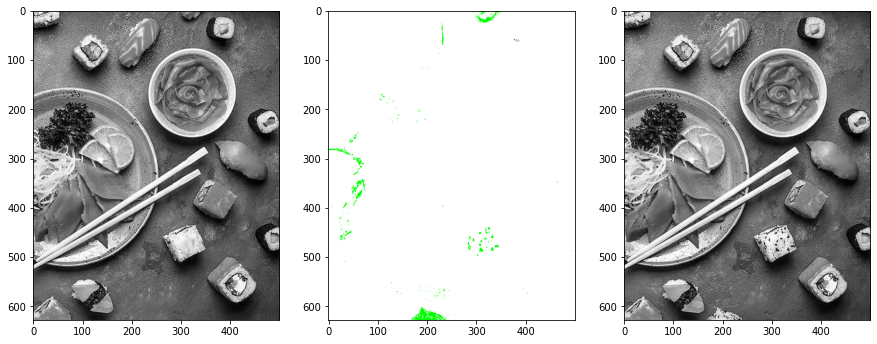

In [20]:
fig, ax = plt.subplots(1, 3,  figsize=(15, 15))

ax[0].imshow(grey_second)
ax[1].imshow(difference_RGB)
ax[2].imshow(grey_first)
plt.show()

### 2.6. Пройдіть [туторіал](https://www.geeksforgeeks.org/image-processing-with-scipy-and-numpy-in-python/). Занесіть відповідний код і пояснення нижче.

#### Відкриваємо та записуємо зображення

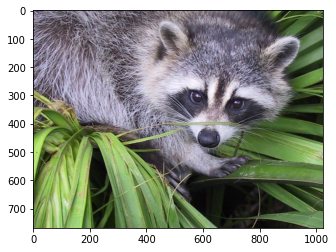

In [21]:
from scipy import misc
import imageio

face = misc.face()
imageio.imsave('raccon2.jpeg',face)
plt.imshow(face)
plt.show()

#### Створюємо RAW-файл

In [22]:
face = misc.face()
  
face.tofile("raccoon.raw")

#### Отримуємо статистичну інформацію

In [23]:
img = misc.face()
  
print(img.max())
print(img.min())
print(img.mean())

255
0
110.16274388631184


#### Обрізаємо зображення

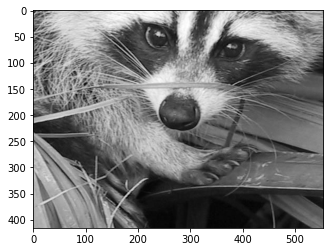

In [24]:
img = misc.face(gray = True)
x, y = img.shape
crop = img[x//3: - x//8, y//3: - y//8]
plt.imshow(crop)
plt.show()

#### Перевертаємо зображення

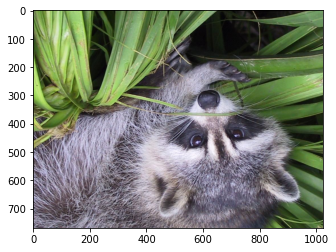

In [25]:
img = misc.face()
  
flip = np.flipud(img)
  
plt.imshow(flip)
plt.show()

#### Повертаємо зображення

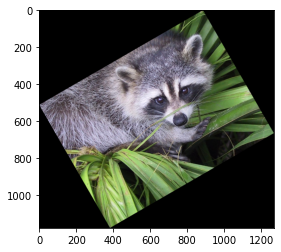

In [26]:
from scipy import ndimage
img = misc.face()
  
rotate = ndimage.rotate(face, 30)
  
plt.imshow(rotate)
plt.show()

#### Фільтруємо зображення

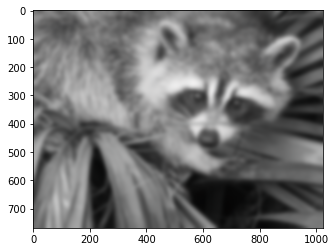

In [27]:
img = misc.face()
  
blur_G = ndimage.gaussian_filter(img,sigma=7)
  
plt.imshow(blur_G)
plt.show()

#### Підвищуємо різкість зображення

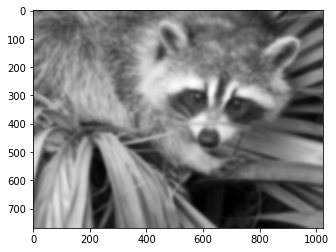

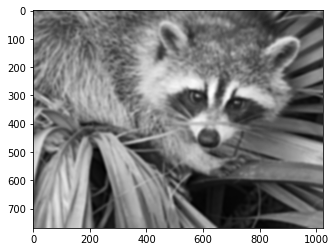

In [28]:
img = misc.face(gray=True).astype(float)
blur = ndimage.gaussian_filter(img, 5)
plt.imshow(blur)
plt.show()
blur_G = ndimage.gaussian_filter(blur, 1)
alpha = 30
sharp = blur+alpha*(blur-blur_G)
plt.imshow(sharp)
plt.show()

#### Знижуємо зашумленість зображення

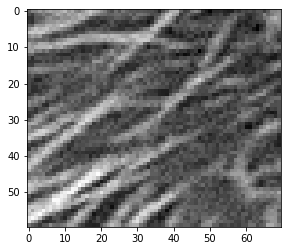

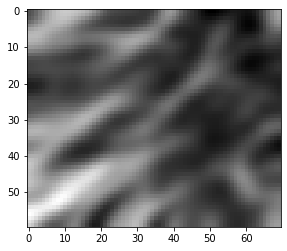

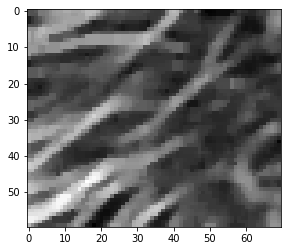

In [29]:
img=misc.face(gray=True).astype(float)
img=img[40:100,30:100]
  
noise_img=img+0.9*img.std()*np.random.random(img.shape)
  
plt.imshow(noise_img)
plt.show()

denoised = ndimage.gaussian_filter(noise_img, 2.2)
  
plt.imshow(denoised)
plt.show()


denoised = ndimage.median_filter(noise_img, 4)
  
plt.imshow(denoised)
plt.show()

#### Визначаємо контури

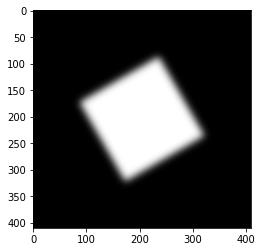

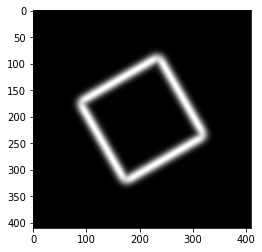

In [30]:
img = np.zeros((300, 300))
img[64:-64, 64:-64] = 1
img = ndimage.rotate(img, 30, mode='constant')
img = ndimage.gaussian_filter(img, 7)
  
plt.imshow(img)
plt.show()

x = ndimage.sobel(img, axis=0, mode='constant')
y = ndimage.sobel(img, axis=1, mode='constant')
Sobel = np.hypot(x, y)
  
plt.imshow(Sobel)
plt.show()

# 
## 3. Перевірка гіпотез за допомогою пакетів scipy.stats та statsmodels (1 бал)
#### Пройдіть [туторіал](https://towardsdatascience.com/hypothesis-testing-in-data-science-875e9d24785e). Занесіть відповідний код і пояснення нижче.

### Вступ до статті
#### У статті розглядаються етапи перевірки гіпотез, визначаються ключова термінологія та демонструються приклади різних типів перевірок гіпотез (hypothesis tests).
#### ...

### t-тест
#### Наприклад, застосуємо [датасет](https://www.kaggle.com/fabdelja/autism-screening-for-toddlers) з Kaggle, який містить анкетні відповіді, щоб визначити, чи має дитина ознаки розладу аутистичного спектру (Autism Spectrum Disorder, ASD). Імпортуємо необхідні бібліотеки та csv-файл:

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2
df = pd.read_csv('Toddler Autism dataset July 2018.csv')
df.head(10)

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes
5,6,1,1,0,0,1,1,1,1,1,1,21,8,m,black,no,no,family member,Yes
6,7,1,0,0,1,1,1,0,0,1,0,33,5,m,asian,yes,no,family member,Yes
7,8,0,1,0,0,1,0,1,1,1,1,33,6,m,asian,yes,no,family member,Yes
8,9,0,0,0,0,0,0,1,0,0,1,36,2,m,asian,no,no,family member,No
9,10,1,1,1,0,1,1,0,1,1,1,22,8,m,south asian,no,no,Health Care Professional,Yes


#### Першою статистичною перевіркою для проведення буде t-критерій Стьюдента для незалежних вибірок (independent samples t-test), у якому ми порівнюємо середні значення 2 груп із залежною величиною. Для нашого прикладу використаємо [рівень значимості](http://www.machinelearning.ru/wiki/index.php?title=%D0%A3%D1%80%D0%BE%D0%B2%D0%B5%D0%BD%D1%8C_%D0%B7%D0%BD%D0%B0%D1%87%D0%B8%D0%BC%D0%BE%D1%81%D1%82%D0%B8) 0.05 та будемо розглядати залежність між стовпцями sex (стать) та qchat_score (загальна оцінка з анкети для визначення ознак ASD). Визначимо нульову та альтернативну гіпотези.
#### ...

#### Далі необхідно відокремити стать на 2 датафрейми (для хлопців та для дівчат):

In [32]:
male_df = df.loc[(df['Sex'] == 'm')]
female_df = df.loc[(df['Sex']== 'f')]

#### Тепер можемо застосувати бібліотеку SciPy з відкритим первинним кодом, щоб обчислити статистику тесту та p-значення.

In [33]:
print(stats.ttest_ind(male_df['Qchat-10-Score'], female_df['Qchat-10-Score'], equal_var=False))
print('WE FAIL TO REJECT THE NULL HYPOTHESIS SINCE OUR P-VALUE IS MORE THAN 0.05')

Ttest_indResult(statistic=3.5533775067196403, pvalue=0.00041253433588685375)
WE FAIL TO REJECT THE NULL HYPOTHESIS SINCE OUR P-VALUE IS MORE THAN 0.05


#### Як можна бачити, оскільки p-значення перевищує рівень значимості (0.05), нам не вдається відкинути нульову гіпотезу. 
#### ...

### ANOVA-тест
#### Перевірка ANOVA здійснюється при порівнянні 3 або більше груп із залежною величиною. У нашому прикладі будемо порівнювати ознаку Ethnicity з qchat_score.
#### ...

In [34]:
print(stats.f_oneway(df['Qchat-10-Score'][df['Ethnicity'] == 'White European'],
                df['Qchat-10-Score'][df['Ethnicity'] == 'asian'], 
                df['Qchat-10-Score'][df['Ethnicity'] == 'middle eastern'],
               df['Qchat-10-Score'][df['Ethnicity'] == 'south asian'],
               df['Qchat-10-Score'][df['Ethnicity'] == 'black'],
               df['Qchat-10-Score'][df['Ethnicity'] == 'Hispanic'],
               df['Qchat-10-Score'][df['Ethnicity'] == 'Others'],
               df['Qchat-10-Score'][df['Ethnicity'] == 'Latino'],
               df['Qchat-10-Score'][df['Ethnicity'] == 'mixed'],
               df['Qchat-10-Score'][df['Ethnicity'] == 'Pacifica'],
               df['Qchat-10-Score'][df['Ethnicity'] == 'Native Indian']))

print('WE REJECT THE NULL HYPOTHESIS SINCE OUR P-VALUE IS LESS THAN 0.05')

F_onewayResult(statistic=4.238502726003112, pvalue=8.460894846474487e-06)
WE REJECT THE NULL HYPOTHESIS SINCE OUR P-VALUE IS LESS THAN 0.05


#### Як ви можете бачити, оскільки p-значення менше за рівень значимості, ми відкидаємо нульову гіпотезу: існує статистично значима різниця середніх значень qchat_scores між етнічними групами. Як нам визначити, в чому полягають відмінності в контексті етнічної групи? Для цього слід провести post-hoc аналіз.
#### ...

In [35]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(df['Qchat-10-Score'], df['Ethnicity'])
mc_results = mc.tukeyhsd()
print(mc_results)
print('POST HOC TESTS SHOW THAT THE MEAN DIFFERENCES OF AGE BETWEEN ASIAN AND WHITE EUROPEAN GROUPS ARE SIGNIFICANTLY DIFFERENT')

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1         group2     meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------
      Hispanic         Latino   0.3231    1.0  -2.004  2.6502  False
      Hispanic  Native Indian      1.4 0.9992 -4.1297  6.9297  False
      Hispanic         Others   0.0286    1.0 -2.1095  2.1667  False
      Hispanic       Pacifica      1.4 0.9747 -2.1777  4.9777  False
      Hispanic White European   0.1156    1.0   -1.43  1.6611  False
      Hispanic          asian  -0.6167 0.9722 -2.1719  0.9385  False
      Hispanic          black    0.117    1.0 -1.8178  2.0518  False
      Hispanic middle eastern   -1.334 0.2125 -2.9425  0.2744  False
      Hispanic          mixed   -0.975 0.9986 -4.5527  2.6027  False
      Hispanic    south asian  -0.5833 0.9958 -2.4689  1.3023  False
        Latino  Native Indian   1.0769 0.9999 -4.5557  6.7095  False
        Latino         Others  -0.

#### Як бачимо з виводу, відмінності знаходяться для груп  White European та Asian. 

### $\chi^2$-аналіз
#### Нарешті, виконаємо $\chi^2$-аналіз поточних даних. Він застосовується для порівняння 2 категорійних величин.
#### ...

In [36]:
df_both = df.groupby('Sex').Ethnicity.value_counts()
df_new = df_both.unstack()
values = {'Native Indian': 0}
df_new.fillna(value=values,inplace=True)
df_new

Ethnicity,Hispanic,Latino,Native Indian,Others,Pacifica,White European,asian,black,middle eastern,mixed,south asian
Sex,,,,,,,,,,,
f,9.0,11.0,0.0,13.0,3.0,94.0,69.0,16.0,80.0,4.0,20.0
m,31.0,15.0,3.0,22.0,5.0,240.0,230.0,37.0,108.0,4.0,40.0


#### Чудово! Тепер може провести наш $\chi^2$-аналіз.

In [37]:
stat, p, dof, expected = chi2_contingency(df_both)
print(expected)
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f)' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
alpha= 1-prob
print('signigicance=%.3f, p=%.3f,' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else: 
    print('Independent (fail to reject)')

[ 94.  80.  69.  20.  16.  13.  11.   9.   4.   3. 240. 230. 108.  40.
  37.  31.  22.  15.   5.   4.   3.]
probability=0.950, critical=nan, stat=0.000)
Independent (fail to reject H0)
signigicance=0.050, p=1.000,
Independent (fail to reject)


#### З отриманих результатів нам не вдалось відкинути нашу нульову гіпотезу, немає зв'язку між величинами Sex та Ethnicity в контексті ознак ASD.